In [1]:
import pandas as pd
import json 
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open ('result1_NMWarm.json') as f:
    NMW_data = json.load(f)

In [3]:
with open ('result2_NMScratch.json') as f:
    NMS_data = json.load(f)

In [4]:
with open ('result3_NBScratch.json') as f:
    NBS_data = json.load(f)

In [17]:
with open('result7_NMWarm_jobbersom.json') as f:
    NMW_jobber_som_data = json.load(f)

In [18]:
with open('result8_NMScratch_jobbersom.json') as f:
    NMS_jobber_som_data = json.load(f)

In [19]:
with open('result9_NMBloom_jobbersom.json') as f:
    NBS_jobber_som_data = json.load(f)

In [8]:
gold_standard = pd.read_csv('gold_standard.csv', delimiter=";", encoding="utf-8")

In [9]:
gold_standard["occupations"] = gold_standard["occupations"].apply(lambda x: x.lower())

In [10]:
gold_standard.drop(columns=['total'], inplace=True)
gold_standard

,occupations,female,male,binary
0,adjunkt,"70,7","29,3",1
1,advokat,"48,1","51,9",0
2,advokatassistent,"85,9","14,1",1
3,advokatsekretær,"96,5","3,5",1
4,agronom,"38,2","61,8",0
...,...,...,...,...
412,vernepleier,"76,3","23,7",1
413,veterinær,"76,6","23,4",1
414,vikler,"15,1","84,9",0
415,webdesigner,"37,8","62,2",0


In [11]:
for i in gold_standard["female"]:
    gold_standard["female"] = gold_standard["female"].replace(i, i.replace(",", "."))
gold_standard

,occupations,female,male,binary
0,adjunkt,70.7,"29,3",1
1,advokat,48.1,"51,9",0
2,advokatassistent,85.9,"14,1",1
3,advokatsekretær,96.5,"3,5",1
4,agronom,38.2,"61,8",0
...,...,...,...,...
412,vernepleier,76.3,"23,7",1
413,veterinær,76.6,"23,4",1
414,vikler,15.1,"84,9",0
415,webdesigner,37.8,"62,2",0


In [12]:
gold_standard['scale_score'] = (((gold_standard['female']).astype(float) - 50)*2)

In [13]:
print(gold_standard.loc[gold_standard['occupations'] == "lege"])

    occupations female  male  binary  scale_score
232        lege   51.6  48,4       1          3.2


In [20]:
print(NMW_data)
print(NMS_data)
print(NBS_data)
print(NMW_jobber_som_data)
print(NMS_jobber_som_data)
print(NBS_jobber_som_data)

{'adjunkt': {'Mann': 71.58, 'Kvinne': 28.42}, 'advokat': {'Mann': 72.23, 'Kvinne': 27.77}, 'advokatassistent': {'Mann': 55.31, 'Kvinne': 44.69}, 'advokatsekretær': {'Mann': 53.31, 'Kvinne': 46.69}, 'agronom': {'Mann': 84.94, 'Kvinne': 15.06}, 'aksjemegler': {'Mann': 77.73, 'Kvinne': 22.27}, 'aktivitør': {'Mann': 63.39, 'Kvinne': 36.61}, 'aktuar': {'Mann': 80.37, 'Kvinne': 19.63}, 'allmennlege': {'Mann': 72.04, 'Kvinne': 27.96}, 'aluminiumskonstruktør': {'Mann': 84.4, 'Kvinne': 15.6}, 'ambulansearbeider': {'Mann': 75.9, 'Kvinne': 24.1}, 'animatør': {'Mann': 85.69, 'Kvinne': 14.31}, 'anleggsgartner': {'Mann': 88.33, 'Kvinne': 11.67}, 'anleggsmaskinfører': {'Mann': 88.4, 'Kvinne': 11.6}, 'anleggsmaskinmekaniker': {'Mann': 91.36, 'Kvinne': 8.64}, 'apoteker': {'Mann': 72.3, 'Kvinne': 27.7}, 'apotektekniker': {'Mann': 66.25, 'Kvinne': 33.75}, 'arbeidsmedisiner': {'Mann': 85.67, 'Kvinne': 14.33}, 'arealplanlegger': {'Mann': 74.78, 'Kvinne': 25.22}, 'arkeolog': {'Mann': 83.39, 'Kvinne': 16.61}

In [21]:
resultat_NMW_df = pd.DataFrame(NMW_data).T.reset_index()
resultat_NMS_df = pd.DataFrame(NMS_data).T.reset_index()
resultat_NBS_df = pd.DataFrame(NBS_data).T.reset_index()
resultat_NMW_jobber = pd.DataFrame(NMW_jobber_som_data).T.reset_index()
result_NMS_jobber= pd.DataFrame(NMS_jobber_som_data).T.reset_index()
result_NBS_jobber = pd.DataFrame(NBS_jobber_som_data).T.reset_index()

result_df_list = [resultat_NMW_df, resultat_NMS_df, resultat_NBS_df, resultat_NMW_jobber, result_NMS_jobber, result_NBS_jobber]

In [22]:
for i in result_df_list:
    i.columns = ['occupations', 'pred_male', 'pred_female']

In [24]:
resultat_NMW_df

,occupations,pred_male,pred_female
0,adjunkt,71.58,28.42
1,advokat,72.23,27.77
2,advokatassistent,55.31,44.69
3,advokatsekretær,53.31,46.69
4,agronom,84.94,15.06
...,...,...,...
412,vernepleier,64.02,35.98
413,veterinær,67.66,32.34
414,vikler,72.50,27.50
415,webdesigner,82.70,17.30


In [24]:
NMWarm_merged = pd.merge(gold_standard, resultat_NMW_df, on='occupations', how='left')
NMScratch_merged = pd.merge(gold_standard, resultat_NMS_df, on='occupations', how='left')
NBScratch_merged = pd.merge(gold_standard, resultat_NBS_df, on='occupations', how='left')
NMWarm_jobber_merged = pd.merge(gold_standard, resultat_NMW_jobber, on='occupations', how='left')
NMScratch_jobber_merged = pd.merge(gold_standard, result_NMS_jobber, on='occupations', how='left')
NBScratch_jobber_merged = pd.merge(gold_standard, resultat_NMW_jobber, on='occupations', how='left')

In [25]:
column_order = ['occupations', 'pred_female', 'pred_male'] + [col for col in gold_standard.columns if col != 'occupations']

In [26]:
NMWarm_merged = NMWarm_merged[column_order]
NMScratch_merged = NMScratch_merged[column_order]
NBScratch_merged = NBScratch_merged[column_order]
NMWarm_jobber_merged = NMWarm_jobber_merged[column_order]
NMScratch_jobber_merged = NMScratch_jobber_merged[column_order]
NBScratch_jobber_merged = NBScratch_jobber_merged[column_order]

In [27]:
NMWarm_merged['pred_scale_score'] = (((NMWarm_merged['pred_female']).astype(float) - 50)*2)
NMScratch_merged['pred_scale_score'] = (((NMScratch_merged['pred_female']).astype(float) - 50)*2)
NBScratch_merged['pred_scale_score'] = (((NBScratch_merged['pred_female']).astype(float) - 50)*2)
NMWarm_jobber_merged['pred_scale_score'] = (((NMWarm_jobber_merged['pred_female']).astype(float) - 50)*2)
NMScratch_jobber_merged['pred_scale_score'] = (((NMScratch_jobber_merged['pred_female']).astype(float) - 50)*2)
NBScratch_jobber_merged['pred_scale_score'] = (((NBScratch_jobber_merged['pred_female']).astype(float) - 50)*2)


In [28]:
NBScratch_jobber_merged

,occupations,pred_female,pred_male,female,male,binary,scale_score,pred_scale_score
0,adjunkt,28.39,71.61,70.7,"29,3",1,41.4,-43.22
1,advokat,30.28,69.72,48.1,"51,9",0,-3.8,-39.44
2,advokatassistent,45.04,54.96,85.9,"14,1",1,71.8,-9.92
3,advokatsekretær,47.01,52.99,96.5,"3,5",1,93.0,-5.98
4,agronom,15.43,84.57,38.2,"61,8",0,-23.6,-69.14
...,...,...,...,...,...,...,...,...
412,vernepleier,36.58,63.42,76.3,"23,7",1,52.6,-26.84
413,veterinær,33.54,66.46,76.6,"23,4",1,53.2,-32.92
414,vikler,28.59,71.41,15.1,"84,9",0,-69.8,-42.82
415,webdesigner,19.14,80.86,37.8,"62,2",0,-24.4,-61.72


In [29]:
NMWarm_merged['pred_binary'] = (NMWarm_merged['pred_female'] > NMWarm_merged['pred_male']).astype(int)
NMScratch_merged['pred_binary'] = (NMScratch_merged['pred_female'] > NMScratch_merged['pred_male']).astype(int)
NBScratch_merged['pred_binary'] = (NBScratch_merged['pred_female'] > NBScratch_merged['pred_male']).astype(int)
NMWarm_jobber_merged['pred_binary'] = (NMWarm_jobber_merged['pred_female'] > NMWarm_jobber_merged['pred_male']).astype(int)
NMScratch_jobber_merged['pred_binary'] = (NMScratch_jobber_merged['pred_female'] > NMScratch_jobber_merged['pred_male']).astype(int)
NBScratch_jobber_merged['pred_binary'] = (NBScratch_jobber_merged['pred_female'] > NBScratch_jobber_merged['pred_male']).astype(int)


In [30]:
NMWarm_merged.to_csv('NMWarm_results.csv', index=False, sep=',', encoding='utf-8')
NMScratch_merged.to_csv('NMScratch_results.csv', index=False, sep=',', encoding='utf-8')
NBScratch_merged.to_csv('NBScratch_results.csv', index=False, sep=',', encoding='utf-8')

In [31]:
k = (NMWarm_merged['binary'] == NMWarm_merged['pred_binary']).sum()
k

260

In [32]:
cm_NMW = confusion_matrix(NMWarm_merged['binary'], NMWarm_merged['pred_binary'])
cm_NMS = confusion_matrix(NMScratch_merged['binary'], NMScratch_merged['pred_binary'])
cm_NBS = confusion_matrix(NBScratch_merged['binary'], NBScratch_merged['pred_binary'])
cm_NMW_jobber = confusion_matrix(NMWarm_jobber_merged['binary'], NMWarm_jobber_merged['pred_binary'])
cm_NMS_jobber = confusion_matrix(NMScratch_jobber_merged['binary'], NMScratch_jobber_merged['pred_binary'])
cm_NBS_jobber = confusion_matrix(NBScratch_jobber_merged['binary'], NBScratch_jobber_merged['pred_binary'])

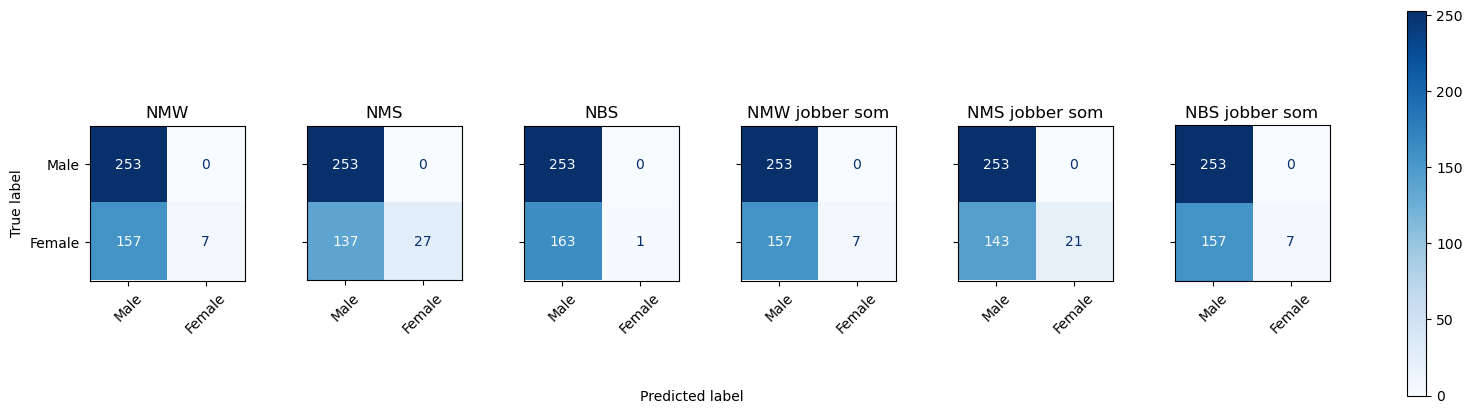

In [33]:
cms = {"NMW": cm_NMW, "NMS": cm_NMS, "NBS": cm_NBS, "NMW jobber som": cm_NMW_jobber, "NMS jobber som": cm_NMS_jobber, "NBS jobber som": cm_NBS_jobber}
f, axes = plt.subplots(1, 6, figsize=(20, 5), sharey='row')
for i, (key, classifier) in enumerate(cms.items()):
    cf_matrix =classifier
    disp = ConfusionMatrixDisplay(cf_matrix, display_labels=["Male", "Female"])
    disp.plot(ax=axes[i], xticks_rotation=45, cmap='Blues')
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axes)
plt.show()

In [34]:
accuracy_NMW = accuracy_score(NMWarm_merged['binary'], NMWarm_merged['pred_binary'])
accuracy_NMS = accuracy_score(NMScratch_merged['binary'], NMScratch_merged['pred_binary'])
accuracy_NBS = accuracy_score(NBScratch_merged['binary'], NBScratch_merged['pred_binary'])
accuracy_NMW_jobber = accuracy_score(NMWarm_jobber_merged['binary'], NMWarm_jobber_merged['pred_binary'])
accuracy_NMS_jobber = accuracy_score(NMScratch_jobber_merged['binary'], NMScratch_jobber_merged['pred_binary'])
accuracy_NBS_jobber = accuracy_score(NBScratch_jobber_merged['binary'], NBScratch_jobber_merged['pred_binary'])

In [35]:
print(f"Accuracy NMW: {accuracy_NMW}")
print(f"Accuracy NMS: {accuracy_NMS}")
print(f"Accuracy NBS: {accuracy_NBS}")
print(f"Accuracy NMW jobber som: {accuracy_NMW_jobber}")
print(f"Accuracy NMS jobber som: {accuracy_NMS_jobber}")
print(f"Accuracy NBS jobber som: {accuracy_NBS_jobber}")

Accuracy NMW: 0.6235011990407674
Accuracy NMS: 0.6714628297362111
Accuracy NBS: 0.6091127098321343
Accuracy NMW jobber som: 0.6235011990407674
Accuracy NMS jobber som: 0.657074340527578
Accuracy NBS jobber som: 0.6235011990407674


In [46]:
f1_NMW = f1_score(NMWarm_merged['binary'], NMWarm_merged['pred_binary'])
f1_NMS = f1_score(NMScratch_merged['binary'], NMScratch_merged['pred_binary'])
f1_NBS = f1_score(NBScratch_merged['binary'], NBScratch_merged['pred_binary'])

f1_NMW_jobber = f1_score(NMWarm_jobber_merged['binary'], NMWarm_jobber_merged['pred_binary'])
f1_NMS_jobber = f1_score(NMScratch_jobber_merged['binary'], NMScratch_jobber_merged['pred_binary'])
f1_NBS_jobber = f1_score(NBScratch_jobber_merged['binary'], NBScratch_jobber_merged['pred_binary'])

precision_NMW = precision_score(NMWarm_merged['binary'], NMWarm_merged['pred_binary'])
precision_NMS = precision_score(NMScratch_merged['binary'], NMScratch_merged['pred_binary'])
precision_NBS = precision_score(NBScratch_merged['binary'], NBScratch_merged['pred_binary'])

precision_NMW_jobber = precision_score(NMWarm_jobber_merged['binary'], NMWarm_jobber_merged['pred_binary'])
precision_NMS_jobber = precision_score(NMScratch_jobber_merged['binary'], NMScratch_jobber_merged['pred_binary'])
precision_NBS_jobber = precision_score(NBScratch_jobber_merged['binary'], NBScratch_jobber_merged['pred_binary'])

recall_NMW = recall_score(NMWarm_merged['binary'], NMWarm_merged['pred_binary'])
recall_NMS = recall_score(NMScratch_merged['binary'], NMScratch_merged['pred_binary'])
recall_NBS = recall_score(NBScratch_merged['binary'], NBScratch_merged['pred_binary'])

recall_NMW_jobber = recall_score(NMWarm_jobber_merged['binary'], NMWarm_jobber_merged['pred_binary'])
recall_NMS_jobber = recall_score(NMScratch_jobber_merged['binary'], NMScratch_jobber_merged['pred_binary'])
recall_NBS_jobber = recall_score(NBScratch_jobber_merged['binary'], NBScratch_jobber_merged['pred_binary'])

In [47]:
print(f"f1 score for NMWarm: {f1_NMW}")
print(f"f1 score for NMScratch: {f1_NMS}")
print(f"f1 score for NBScratch: {f1_NBS}")

print(f"f1 score for NMW_jobber: {f1_NMW_jobber}")
print(f"f1 score for NMS_jobber: {f1_NMS_jobber}")
print(f"f1 score for NBS_jobber: {f1_NBS_jobber}")
print("")
print(f"Precision for NMWarm: {precision_NMW}")
print(f"Precision for NMScratch: {precision_NMS}")
print(f"Precision for NBScratch: {precision_NBS}")

print(f"Precision for NMW_jobber: {precision_NMW_jobber}")
print(f"Precision for NMS_jobber: {precision_NMS_jobber}")
print(f"Precision for NBS_jobber: {precision_NBS_jobber}")
print("")
print(f"Recall for NMWarm: {recall_NMW}")
print(f"Recall for NMScratch: {recall_NMS}")
print(f"Recall for NBScratch: {recall_NBS}")

print(f"Recall for NMW_jobber: {recall_NMW_jobber}")
print(f"Recall for NMS_jobber: {recall_NMS_jobber}")
print(f"Recall for NBS_jobber: {recall_NBS_jobber}")

f1 score for NMWarm: 0.08187134502923978
f1 score for NMScratch: 0.28272251308900526
f1 score for NBScratch: 0.012121212121212121
f1 score for NMW_jobber: 0.08187134502923978
f1 score for NMS_jobber: 0.22702702702702707
f1 score for NBS_jobber: 0.08187134502923978

Precision for NMWarm: 1.0
Precision for NMScratch: 1.0
Precision for NBScratch: 1.0
Precision for NMW_jobber: 1.0
Precision for NMS_jobber: 1.0
Precision for NBS_jobber: 1.0

Recall for NMWarm: 0.042682926829268296
Recall for NMScratch: 0.16463414634146342
Recall for NBScratch: 0.006097560975609756
Recall for NMW_jobber: 0.042682926829268296
Recall for NMS_jobber: 0.12804878048780488
Recall for NBS_jobber: 0.042682926829268296


In [48]:
f1s = {"NMW": f1_NMW, "NMS": f1_NMS, "NBS": f1_NBS, "NMW jobber som": f1_NMW_jobber, "NMS jobber som": f1_NMS_jobber, "NBS jobber som": f1_NBS_jobber}
f1sModels = list(f1s.keys())
f1sScores = list(f1s.values())
precisionScores = [precision_NMW, precision_NMS, precision_NBS, precision_NMW_jobber, precision_NMS_jobber, precision_NBS_jobber]
recallScores = [recall_NMW, recall_NMS, recall_NBS, recall_NMW_jobber, recall_NMS_jobber, recall_NBS_jobber]

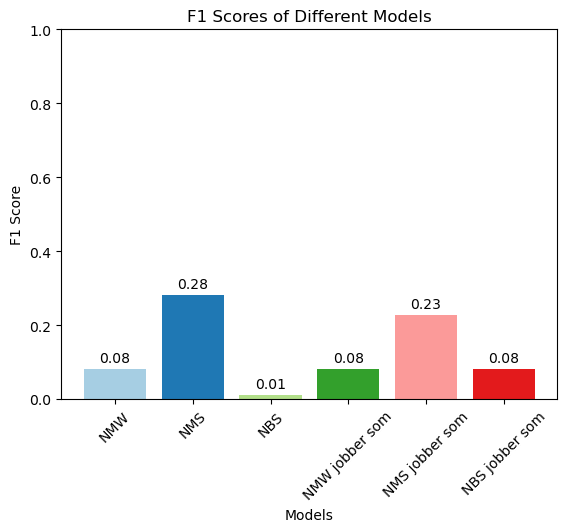

In [39]:
fig, ax = plt.subplots()
bars = ax.bar(f1sModels, f1sScores, color=plt.cm.Paired(np.arange(len(f1sModels))))

# Adding data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

ax.set_xlabel('Models')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores of Different Models')
ax.set_ylim(0, 1)  # F1 score range from 0 to 1
plt.xticks(rotation=45)
plt.show()

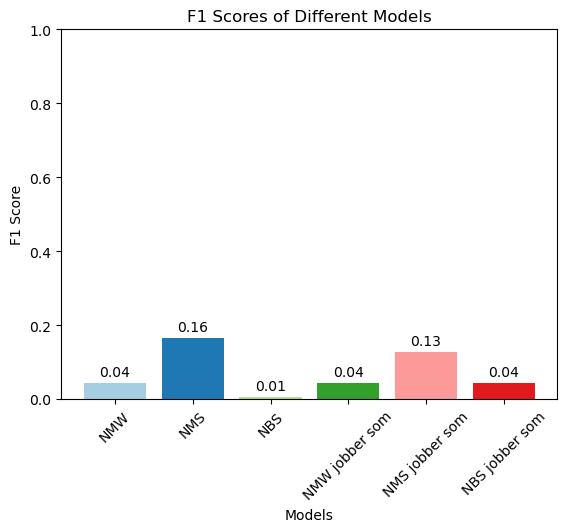

In [49]:
fig, ax = plt.subplots()
bars = ax.bar(f1sModels, recallScores, color=plt.cm.Paired(np.arange(len(f1sModels))))

# Adding data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

ax.set_xlabel('Models')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores of Different Models')
ax.set_ylim(0, 1)  # F1 score range from 0 to 1
plt.xticks(rotation=45)
plt.show()

In [40]:
yrker = ["Midwife", "Secretary", "sykepleier", "diplomat", "lege", "førsteamanuensis", "dommer", "pilot", "rørlegger", "murer"]
gold_standard_scales = [99.6, 80.2, 80.0, 6.6, 3.2, -5.6, -8.6, -90.8, -97.6, -98.2]

In [41]:
data2 = {
    "occupations": yrker,
    "gold": gold_standard_scales
}

In [42]:
def get_scale_score(df, liste):
    temp = []
    for i in liste:
        temp.append(df.loc[df['occupations'] == i]['pred_scale_score'].values[0])
    return temp


In [43]:
nmw = get_scale_score(NMWarm_merged, yrker)
nms = get_scale_score(NMScratch_merged, yrker)
nbs = get_scale_score(NBScratch_merged, yrker)
nmw_jobber = get_scale_score(NMWarm_jobber_merged, yrker)
nms_jobber = get_scale_score(NMScratch_jobber_merged, yrker)
nbs_jobber = get_scale_score(NBScratch_jobber_merged, yrker)

In [44]:
data2['nmw'] = nmw
data2['nms'] = nms
data2['nbs'] = nbs
data2['nmw_jobber'] = nmw_jobber
data2['nms_jobber'] = nms_jobber
data2['nbs_jobber'] = nbs_jobber

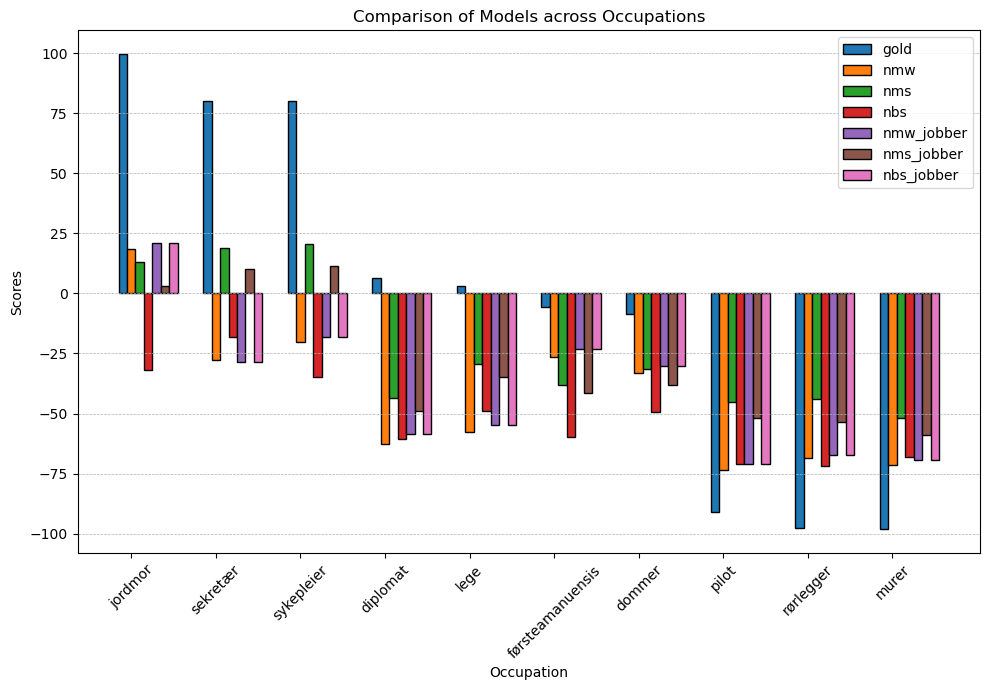

In [45]:
df = pd.DataFrame(data2)

# Set the positions and width for the bars
positions = np.arange(len(df['occupations']))
width = 0.1

# Plotting each column
fig, ax = plt.subplots(figsize=(10, 7))
for i, column in enumerate(df.columns[1:]):  # Skip the first column for occupations
    ax.bar(positions + i*width, df[column], width, label=column, edgecolor='black')

# Adding labels, title, and custom x-ticks
ax.set_xlabel('Occupation')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Models across Occupations')
ax.set_xticks(positions + width)
ax.set_xticklabels(df['occupations'])
ax.legend()

# Rotate the x labels for better visibility
plt.xticks(rotation=45)
plt.grid(visible=True, which='both', axis='y', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()